In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
uwrfkaggler_ravdess_emotional_speech_audio_path = kagglehub.dataset_download('uwrfkaggler/ravdess-emotional-speech-audio')
ejlok1_toronto_emotional_speech_set_tess_path = kagglehub.dataset_download('ejlok1/toronto-emotional-speech-set-tess')
imsparsh_audio_speech_sentiment_path = kagglehub.dataset_download('imsparsh/audio-speech-sentiment')

print('Data source import complete.')


In [ ]:
# GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
# ! pip install python_speech_features

In [ ]:
TESS = "../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "../input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE = "../input/surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA = "../input/cremad/AudioWAV/"

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10,3))
    plt.title(f'Waveplot for Audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

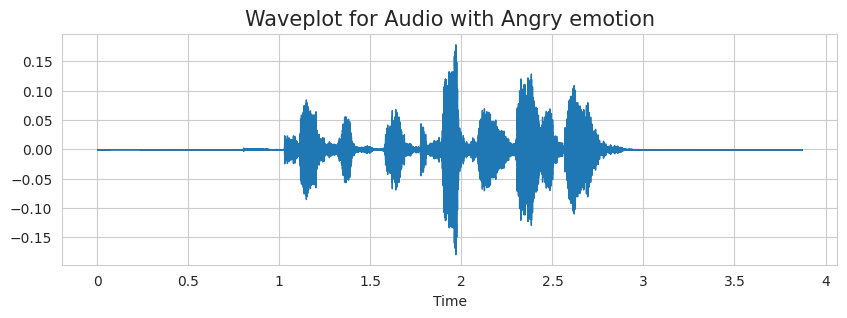

In [ ]:
emotion='Angry'
path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

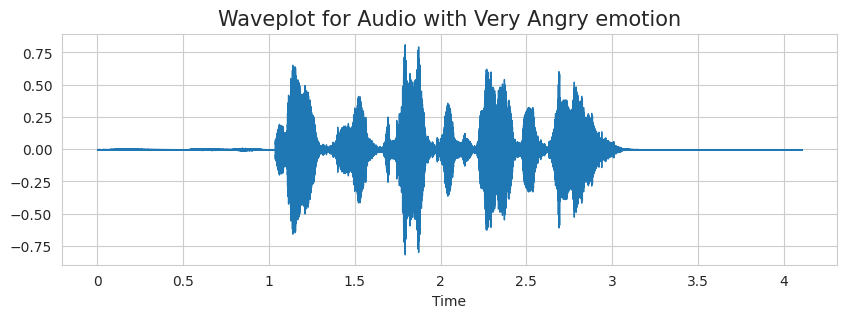

In [ ]:
emotion = 'Very Angry'
path = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

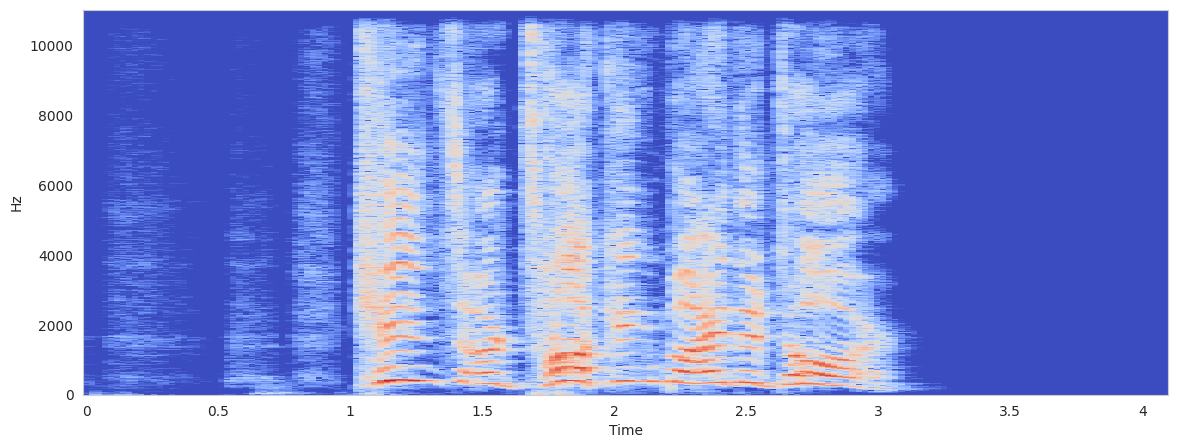

In [ ]:
figure = plt.figure(figsize=(14,5))

audio,rate = librosa.load(path)

stft_audio = librosa.stft(audio)
db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(db_audio, sr=rate,x_axis="time", y_axis="hz")
Audio(audio, rate=rate)

In [ ]:
Main_WAV_Path = Path("../input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data")
Wav_Path = list(Main_WAV_Path.glob(r"**/*.wav"))
Wav_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Wav_Path))
Wav_Path_Series = pd.Series(Wav_Path,name="WAV").astype(str)
Wav_Labels_Series = pd.Series(Wav_Labels,name="EMOTION")
Main_Wav_Data = pd.concat([Wav_Path_Series,Wav_Labels_Series],axis=1)

In [ ]:
Main_Wav_Data.head()

,WAV,EMOTION
0,../input/toronto-emotional-speech-set-tess/TES...,YAF_fear
1,../input/toronto-emotional-speech-set-tess/TES...,YAF_fear
2,../input/toronto-emotional-speech-set-tess/TES...,YAF_fear
3,../input/toronto-emotional-speech-set-tess/TES...,YAF_fear
4,../input/toronto-emotional-speech-set-tess/TES...,YAF_fear


In [ ]:
Main_Wav_Data['EMOTION'].value_counts().reset_index()

,EMOTION,count
0,YAF_fear,200
1,OAF_angry,200
2,OAF_Fear,200
3,OAF_disgust,200
4,OAF_neutral,200
5,YAF_angry,200
6,OAF_Sad,200
7,YAF_disgust,200
8,YAF_neutral,200
9,OAF_Pleasant_surprise,200


In [ ]:
Main_Wav_Data = Main_Wav_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
Main_Wav_Data.head(-1)

,WAV,EMOTION
0,../input/toronto-emotional-speech-set-tess/TES...,OAF_Pleasant_surprise
1,../input/toronto-emotional-speech-set-tess/TES...,YAF_disgust
2,../input/toronto-emotional-speech-set-tess/TES...,OAF_Sad
3,../input/toronto-emotional-speech-set-tess/TES...,YAF_happy
4,../input/toronto-emotional-speech-set-tess/TES...,OAF_neutral
...,...,...
2794,../input/toronto-emotional-speech-set-tess/TES...,YAF_neutral
2795,../input/toronto-emotional-speech-set-tess/TES...,YAF_neutral
2796,../input/toronto-emotional-speech-set-tess/TES...,YAF_happy
2797,../input/toronto-emotional-speech-set-tess/TES...,YAF_disgust


In [ ]:
def add_noise(x, noise_level=0.015):
    noise_amp = noise_level * np.random.uniform() * np.max(np.abs(x))
    return x + noise_amp * np.random.normal(size=len(x))

def stretch_process(x, rate=0.8):
    return librosa.effects.time_stretch(x, rate=rate)

def shift_process(x, max_shift_ms=5, sr=22050):
    shift = int(np.random.uniform(-max_shift_ms, max_shift_ms) * sr / 1000)
    return np.roll(x, shift)

def pitch_process(x, sr, n_steps=0.7):
    return librosa.effects.pitch_shift(x, sr=sr, n_steps=n_steps)


In [ ]:
def extract_process(data):
    output_result = np.array([])

    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)


In [ ]:
def extract_process(data):

    output_result = np.array([])
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))

    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_stft))

    mfcc_out = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_out))

    root_mean_out = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_mean_out))

    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_spectogram))

    return output_result

In [ ]:
def export_process(path):
    data,sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    output_1 = extract_process(data)
    result = np.array(output_1)

    noise_out = add_noise(data)
    output_2 = extract_process(noise_out)
    result = np.vstack((result, output_2))

    new_out = stretch_process(data)
    stretch_pitch = pitch_process(new_out, sample_rate)
    output_3 = extract_process(stretch_pitch)
    result = np.vstack((result, output_3))

    return result

In [ ]:
rate, speech = read(Main_Wav_Data["WAV"][2342])
print(Main_Wav_Data["EMOTION"][2342])

Audio(speech, rate=rate, autoplay=False)

YAF_pleasant_surprised


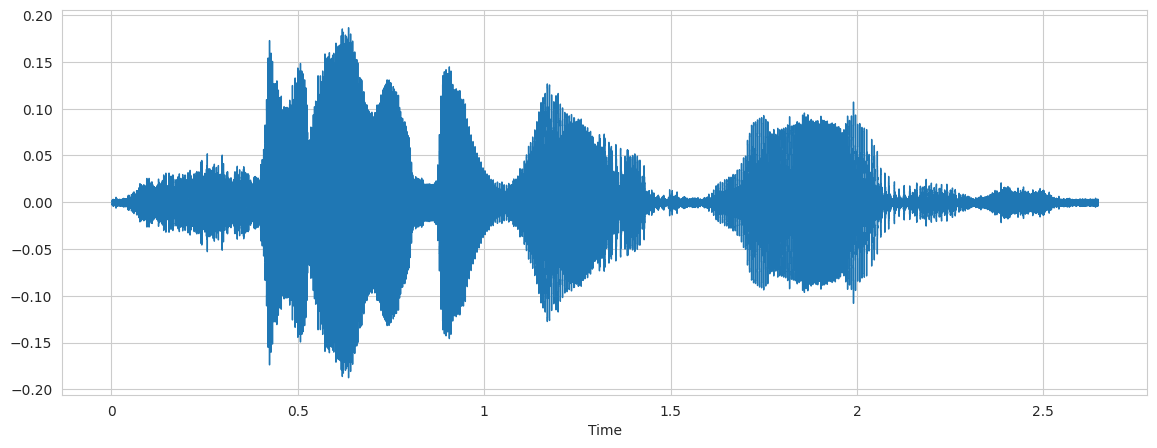

In [ ]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

noise_injection = add_noise(audio_speech)

librosa.display.waveshow(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)

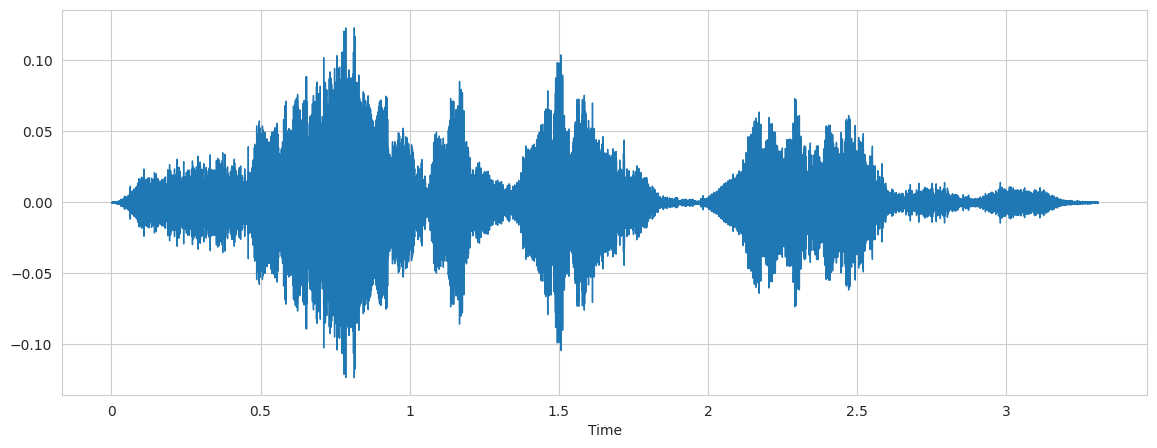

In [ ]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stretching_audio = stretch_process(audio_speech)
librosa.display.waveshow(stretching_audio,sr=sample_rate)
Audio(stretching_audio,rate=sample_rate)

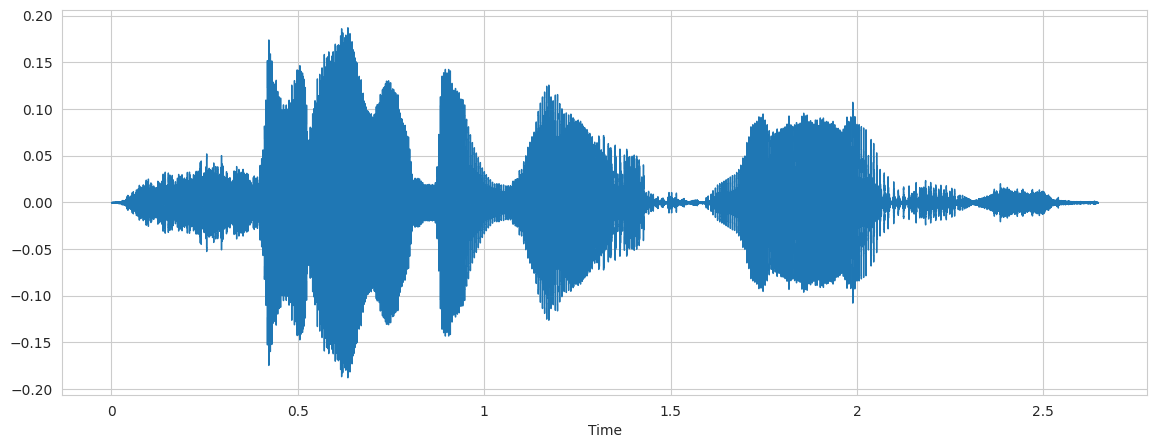

In [ ]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

shifting_audio = shift_process(audio_speech)
librosa.display.waveshow(shifting_audio,sr=sample_rate)
Audio(shifting_audio,rate=sample_rate)

In [ ]:
x_Train, y_Train = [],[]

for path,emotion in zip(Main_Wav_Data.WAV,Main_Wav_Data.EMOTION):
    features = export_process(path)
    for element in features:
        x_Train.append(element)
        y_Train.append(emotion)

In [ ]:
New_Features_Wav = pd.DataFrame(x_Train)
New_Features_Wav["EMOTIONS"] = y_Train

In [ ]:
New_Features_Wav.to_csv("New_Wav_Set.csv",index=False)

In [ ]:
New_Features_Wav.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,EMOTIONS
0,0.044826,0.329572,0.411909,0.378225,0.368412,0.430670,0.638284,0.693251,0.448787,0.338503,...,0.000118,0.000102,0.000107,0.000082,0.000077,0.000082,0.000074,0.000021,1.011633e-06,OAF_Pleasant_surprise
1,0.061379,0.371805,0.449967,0.400933,0.383312,0.456670,0.652561,0.714020,0.477395,0.371440,...,0.000149,0.000125,0.000135,0.000112,0.000103,0.000107,0.000098,0.000044,2.432939e-05,OAF_Pleasant_surprise
2,0.053683,0.338470,0.305396,0.404021,0.425267,0.334982,0.391364,0.558912,0.749244,0.632601,...,0.000023,0.000022,0.000030,0.000034,0.000029,0.000025,0.000019,0.000013,1.123588e-06,OAF_Pleasant_surprise
3,0.096952,0.620937,0.583971,0.553058,0.604476,0.709505,0.724194,0.706130,0.689542,0.633213,...,0.000053,0.000048,0.000040,0.000042,0.000030,0.000021,0.000021,0.000011,1.182216e-06,YAF_disgust
4,0.178887,0.632580,0.600496,0.581713,0.634752,0.735295,0.722496,0.713328,0.698653,0.653242,...,0.000084,0.000077,0.000071,0.000077,0.000057,0.000049,0.000049,0.000041,3.117637e-05,YAF_disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.058006,0.635519,0.406851,0.370775,0.404711,0.507197,0.455434,0.395454,0.421722,0.353537,...,0.000115,0.000082,0.000030,0.000011,0.000015,0.000021,0.000019,0.000015,9.260876e-07,OAF_angry
8395,0.132846,0.750306,0.591189,0.497455,0.492050,0.546618,0.507734,0.419790,0.461577,0.456483,...,0.000206,0.000183,0.000132,0.000109,0.000110,0.000129,0.000122,0.000105,9.470741e-05,OAF_angry
8396,0.065669,0.432065,0.704422,0.529856,0.363261,0.345252,0.423203,0.455066,0.365820,0.391558,...,0.000028,0.000032,0.000034,0.000015,0.000004,0.000003,0.000005,0.000003,2.281528e-07,OAF_angry
8397,0.086765,0.443058,0.448797,0.369519,0.469886,0.494911,0.370634,0.333953,0.358227,0.413079,...,0.005206,0.003654,0.002380,0.001361,0.000964,0.000747,0.000484,0.000252,2.144442e-05,YAF_happy


In [ ]:
print(New_Features_Wav["EMOTIONS"].value_counts())

EMOTIONS
OAF_Pleasant_surprise     600
YAF_disgust               600
OAF_Sad                   600
YAF_happy                 600
OAF_neutral               600
YAF_fear                  600
YAF_pleasant_surprised    600
OAF_angry                 600
YAF_angry                 600
OAF_disgust               600
YAF_sad                   600
OAF_Fear                  600
YAF_neutral               600
OAF_happy                 600
Name: count, dtype: int64


In [ ]:
encoder_label = OneHotEncoder()
scaler_data = StandardScaler()

In [ ]:
X = New_Features_Wav.iloc[:,:-1].values
Y = New_Features_Wav["EMOTIONS"].values

In [ ]:
Y = encoder_label.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,train_size=0.9,random_state=42,shuffle=True)

In [ ]:
xTrain = scaler_data.fit_transform(xTrain)
xTest = scaler_data.transform(xTest)

In [ ]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)

In [ ]:
Model=Sequential()
Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(xTrain.shape[1], 1)))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(Dropout(0.2))

Model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Flatten())
Model.add(Dense(units=32, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=14, activation='softmax'))

2026-01-03 11:34:18.459672: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [ ]:
Conv1D_Model = Model.fit(xTrain, yTrain, batch_size=64, epochs=50, validation_data=(xTest, yTest), callbacks=[early_stop])

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 228ms/step - accuracy: 0.1883 - loss: 2.3518 - val_accuracy: 0.6333 - val_loss: 1.2140
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 221ms/step - accuracy: 0.5743 - loss: 1.2323 - val_accuracy: 0.8476 - val_loss: 0.5390
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 219ms/step - accuracy: 0.7367 - loss: 0.7469 - val_accuracy: 0.9250 - val_loss: 0.2927
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 27s 224ms/step - accuracy: 0.8282 - loss: 0.4948 - val_accuracy: 0.9333 - val_loss: 0.2313
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 218ms/step - accuracy: 0.8683 - loss: 0.3850 - val_accuracy: 0.9619 - val_loss: 0.1562
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 222ms/step - accuracy: 0.8840 - loss: 0.3379 - val_accuracy: 0.9310 - val_loss: 0.2571
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 218ms/step - accuracy: 0.8932 - loss: 0.3105 - val_accuracy: 0.9643 - val_loss: 0.1392
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 27s 223ms/step - accuracy: 0.9186 - loss: 0

<Axes: >

<Figure size 1000x1000 with 0 Axes>

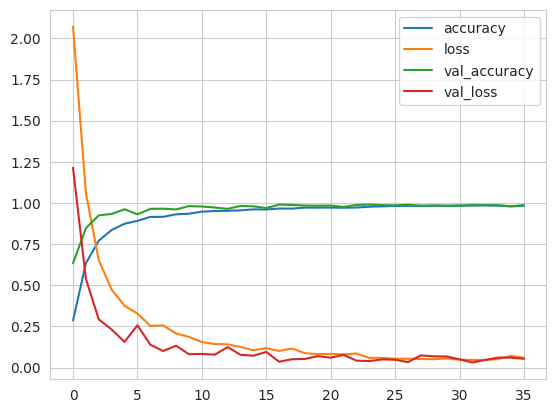

In [ ]:
Grap_Data = pd.DataFrame(Conv1D_Model.history)
figure = plt.figure(figsize=(10,10))
Grap_Data.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


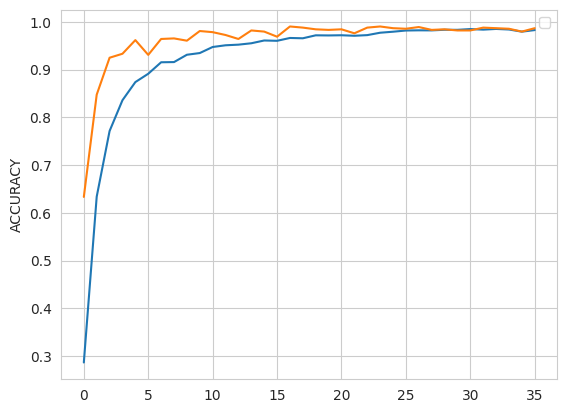

In [ ]:
plt.plot(Conv1D_Model.history["accuracy"])
plt.plot(Conv1D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


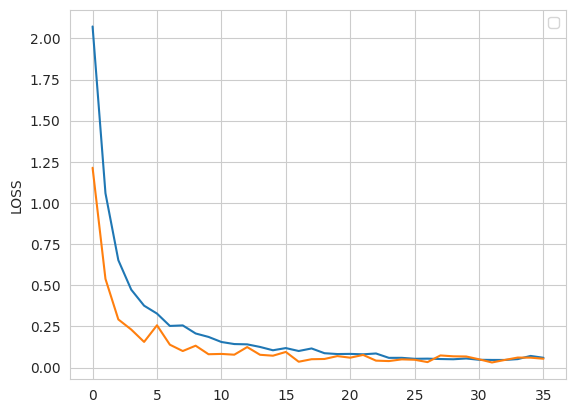

In [ ]:
plt.plot(Conv1D_Model.history["loss"])
plt.plot(Conv1D_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
Model_Results = Model.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9811 - loss: 0.0904
LOSS:  0.0539
ACCURACY:  0.9869


In [ ]:
prediction_test = Model.predict(xTest)
y_prediction = encoder_label.inverse_transform(prediction_test)

yTest = encoder_label.inverse_transform(yTest)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [ ]:
print(prediction_test[0:10])

[[4.97630197e-07 9.99986589e-01 1.06979278e-11 5.68271596e-10
  1.04234618e-06 1.17728969e-05 3.83974469e-18 8.56821471e-12
  1.63397687e-14 7.27966368e-11 9.17788819e-18 3.81107987e-13
  9.25333765e-09 5.89598682e-13]
 [1.16789279e-22 5.85724265e-19 1.31248321e-19 1.86494886e-15
  2.20138988e-23 3.87977798e-22 1.78785205e-18 2.67724787e-14
  8.52476587e-21 1.11524180e-12 3.98205801e-13 9.99999940e-01
  7.19699072e-23 4.15912523e-14]
 [1.31225489e-31 7.54915928e-27 1.00851883e-32 2.16560145e-21
  1.23221257e-25 1.10157485e-37 0.00000000e+00 5.28837452e-32
  2.82995673e-35 2.01130453e-23 1.29368687e-29 3.35361669e-33
  0.00000000e+00 9.99999940e-01]
 [2.69735789e-08 6.25625660e-04 2.30657333e-03 3.18675389e-04
  9.96547639e-01 8.50918070e-07 3.14934312e-07 4.54579876e-08
  6.36310433e-05 2.18560714e-07 2.31321806e-08 3.94087465e-07
  5.54902181e-06 1.30414584e-04]
 [1.38547609e-19 6.72232936e-09 2.27349712e-08 2.67815076e-11
  9.99999940e-01 8.18589118e-17 9.49456353e-18 4.24863157e-17
